In [204]:
import numpy as np
import math

points = np.random.uniform(low=-10, high=10, size=(100, 2))
points = np.asarray(points)

In [205]:
x = np.random.uniform(-10, 10, 300)

points = []

for i in x:
    points.append((i,i**3))
points = np.asarray(points)
points.sort(0)

In [206]:
points

array([[-9.98121783e+00, -9.94375926e+02],
       [-9.94991606e+00, -9.85049944e+02],
       [-9.77488282e+00, -9.33973770e+02],
       [-9.75456436e+00, -9.28161684e+02],
       [-9.75181528e+00, -9.27377165e+02],
       [-9.51712696e+00, -8.62020489e+02],
       [-9.48609588e+00, -8.53615966e+02],
       [-9.48297531e+00, -8.52773820e+02],
       [-9.47343155e+00, -8.50201691e+02],
       [-9.46560151e+00, -8.48095290e+02],
       [-9.38741112e+00, -8.27251407e+02],
       [-9.36716775e+00, -8.21911190e+02],
       [-9.34319356e+00, -8.15616567e+02],
       [-9.33049375e+00, -8.12295185e+02],
       [-9.29058292e+00, -8.01916024e+02],
       [-9.13400572e+00, -7.62050650e+02],
       [-8.83752669e+00, -6.90227432e+02],
       [-8.81395866e+00, -6.84720022e+02],
       [-8.66040158e+00, -6.49552250e+02],
       [-8.64587723e+00, -6.46289638e+02],
       [-8.61268518e+00, -6.38874741e+02],
       [-8.51238705e+00, -6.16813808e+02],
       [-8.49819280e+00, -6.13733373e+02],
       [-8.

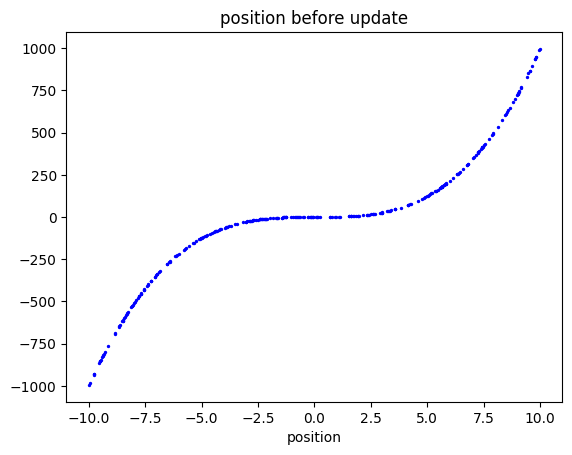

In [207]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position before update')
plt.xlabel('position')
plt.show()

In [ ]:
from scipy.stats import norm

count = 0

while count < 100:
    
    dens = []
    vec = []
    
    for i in range(len(points)):
        sum_pdf = 0
        vec_total = 0
        
        # 여기에 가우시안 넣어야 될듯
        for num2 in points:
            if not np.array_equal(points[i], num2):
                # gaussian 커널로 점들간 거리에 따라 확률추정
                # 이게 벡터의 크기
                distance = np.linalg.norm(points[i] - num2)
                p = norm.pdf(distance, 0, 1)
                # 점 num에서 확률추정
                sum_pdf += p
            
                vec_total += p * np.diff(points[i] - num2)
                
        dens.append(sum_pdf / (len(points)-1))
        vec.append(vec_total)
    
    dens /= np.sum(dens)
    points += vec
    count += 1

기울기에 따라 이동하는 방법 필요
어디에다 projection 해야됨??????

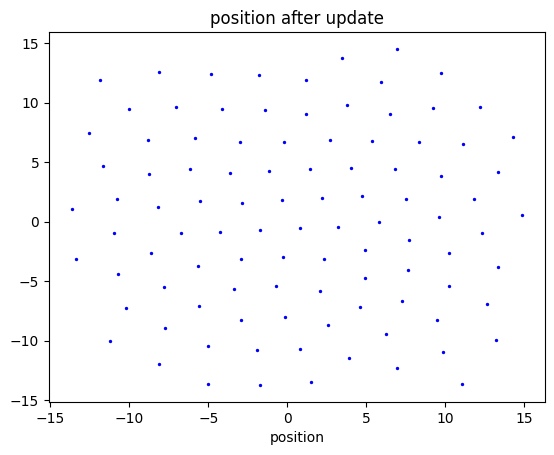

In [157]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.show()